In [174]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline

In [175]:
def emission_height(P, hmin, hmax, ncomp):
    """Function to determine the emission heights given hmin and hmax. Allowed emision heights for young 
       pulsars range between [950, 1000] and between [20, 1000] for old pulsars.
    
       Args:
       -----
       P      : rotational period.
       hmin   : minimum emission height (in km).
       hmax   : maximum emission height (in km).
       ncomp  : integer number of component .
       
       Returns:
       --------
       H      : random emission height.
    """
    
    #num_H = np.random.randint(3,8)  # random number of discrete emission height 
    num_H = ncomp
    
#   emission height for a short period pulsar: only one emission height 
    if P <= 0.15:
        if hmin >= 950 and hmax <= 1000:
            H = np.random.uniform(hmin, hmax, size=1)
            
        else: print "error, emission range not allowed for pulse period P < 0.15 seconds"
            
#   emission height for a long period pulsar:        
    if P > 0.15:
        if hmin >= 20 and hmax <= 1000:
            H = np.random.uniform(hmin, hmax, size=num_H)
        
        else: print "error, emission range not allowed for pulse period P > 0.15 seconds"
        
    return H

########################### simple test #############################
if __name__ == "__main__":
    P = 0.16
    hmin = 50
    hmax = 1000
    ncomp = 5
    heights = emission_height(P, hmin, hmax, ncomp)
    print heights  

[ 587.17712538  625.27099696  132.28731339  234.08951062  374.11196281]


[ 0.02414081  0.02414336  0.02415101  0.02416376  0.02418159  0.02420449
  0.02423244  0.02426543  0.02430342  0.02434639  0.02439431  0.02444714
  0.02450484  0.02456736  0.02463467  0.02470672  0.02478345  0.02486481
  0.02495074  0.02504118  0.02513608  0.02523536  0.02533897  0.02544683
  0.02555888  0.02567505  0.02579526  0.02591944  0.02604751  0.0261794
  0.02631504  0.02645434  0.02659723  0.02674362  0.02689345  0.02704663
  0.02720308  0.02736272  0.02752547  0.02769126  0.02786     0.02803162
  0.02820603  0.02838316  0.02856293  0.02874525  0.02893007  0.02911729
  0.02930684  0.02949865  0.02969264  0.02988874  0.03008687  0.03028697
  0.03048895  0.03069275  0.0308983   0.03110553  0.03131437  0.03152475
  0.0317366   0.03194986  0.03216446  0.03238033  0.03259742  0.03281565
  0.03303497  0.03325531  0.03347661  0.03369881  0.03392185  0.03414566
  0.0343702   0.0345954   0.0348212   0.03504754  0.03527438  0.03550165
  0.03572929  0.03595725  0.03618548  0.03641392  0.

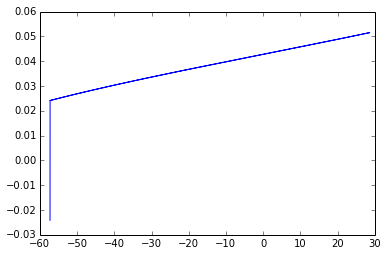

In [192]:
import mapphi as mp
def los(alpha, beta):
    """Function to determine the line of sight cut across the beam.
    
       Args:
       -----
       alpha       : inclination angle
       beta        : impact parameter
       
       Returns:
       --------
       xlos        : the line of sight x-coordinates
       ylos        : the line of sight y-coordinates
       avgthetalos : the line of sight angle in degrees
    """
    
    phi = np.arange(-180,180)
    xlos, ylos = mp.mapphi(alpha, beta, phi)
    thetalos = np.arctan2(ylos, xlos) * (180 / np.pi) - 90.0
    for i in np.arange(len(thetalos)):
        if thetalos[i] < 0:
            thetalos[i] = -thetalos[i]
            
#   find the average thetalos
    avgthetalos = np.average(thetalos)
    
    return xlos, ylos, avgthetalos
################## test ######################
if __name__ == "__main__":
    alpha = 30
    beta = 30
    xlos, ylos, avgthetalos = los(alpha, beta)
    print ylos
    plt.plot(xlos, ylos)
    #print avgthetalos, xlos

In [177]:
from scipy import constants
#import emission_height

def rho(P, heights):
    """Function to determine the opening angle rho given the rotational period and emission height.
       
    
       Args:
       -----
       P   : rotational period (seconds)
       H   : emission height (km)
       
       Returns:
       --------
       rho : the opening angle (degrees)
       
    """
    
    #H = emission_height(P, hmin, hmax, npatch)
    #print H
    rho = np.rad2deg(np.sqrt((9 * np.pi * heights) / (2 * (constants.c / 1000) * P)))   
    #rho = np.sqrt((9 * np.pi * H) / (2 * constants.c * P))
    return rho

#################### simple test #####################################
if __name__ == "__main__":
    opa = rho(P, heights)
    print opa

[ 23.83515865  24.59617787  11.31338538  15.04958276  19.02542122]


In [178]:
def patch_width(P, heights):
    """Function to calculate the width of a patchy emission region 
       within a pulsar beam at a given height.
    
       Args:
       -----
       P             : rotational period (seconds).
       hmin          : minimum emission height (in km).
       hmax          : maximum emission height (in km).
       npatch        : integer number of emission patches.
       
       Returns:
       --------
       patchwidths   : the width of the patchy emission region (degrees).
11.64332549  17.66376908  10.51189607]
    """   
    
    #H = emission_height(P, hmin, hmax, npatch)
    patchwidths = 2.45 * 0.2 * np.sqrt(heights / ( 10 * P)) 
    
    return patchwidths
#################### simple test ################################################
if __name__ == "__main__":
    patchwidths = patch_width(P, heights)
    print patchwidths



[ 9.38686675  9.68657468  4.45548706  5.92689271  7.49267485]


In [179]:
def patch_center(P, heights):
    """Function find centres of the patches
       
       Args:
       -----
       P      : rotatinal period
       hmin   : minimum emission height (in km).
       hmax   : maximum emission height (in km).
       ncomp : number of emission components
       
       
       Returns:
       --------
       patch_centerx : the patch center projection on the x-axis 
       patch_centery : the patch center projection on the y-axis 
    """
    
    opa = rho(P, heights)  # opening angle of the beam (rho in degrees)
    centerx = []
    centery = []
    
    for comp in opa: #for each emission height (comp!)
        npatch = np.random.randint(2,10+1)
        #npatch = np.random.randint(1,3)
        tempCenterX = []
        tempCenterY = []
        theta = 2 * np.pi * np.random.random(npatch)
    
        #centers of the patches in the rotational plane (x,y coords):
        #np.random.seed(0) 
        #patch_centerx = np.zeros(npatch)
        #patch_centery = np.zeros(npatch)
    
        #print len(opa), opa

        #for short periods 
        if P <= 0.15:
            if hmin >= 950 and hmax <= 1000:
                for i in np.arange(npatch):
                    tempCenterX.append(comp * np.sin(theta[i]))
                    tempCenterY.append(comp * np.cos(theta[i]))
                
        #for longer periods
        if P > 0.15:
            if hmin >= 20 and hmax <= 1000:
                for i in np.arange(npatch):
                    tempCenterX.append(comp * np.sin(theta[i]))
                    tempCenterY.append(comp * np.cos(theta[i]))
        centerx.append(tempCenterX)
        centery.append(tempCenterY)
        
    return centerx, centery

########################### simple test ###########################
if __name__ == "__main__":
    cx, cy = patch_center(P, heights)
    for i in range(len(cx)):
        print 'height %i:\n'%i, cx[i], '\n', cy[i], '\n'

height 0:
[-23.307676448616604, 9.4845888378440133, 21.55190108843334, 16.622013294656522, 23.328370020760531, -9.8795985357555587, -23.766128844823736, -21.06515309670197] 
[-4.9866829312824956, -21.866809613374926, -10.179899192277254, -17.082841160732109, 4.8889610619253814, 21.691203767030498, 1.8127073182889921, 11.152314248757916] 

height 1:
[22.712791334468882, -10.346517608271, -14.54565938814614, 24.550255292242912] 
[9.4393366191694046, 22.314155583280655, 19.834206789714408, -1.5023085897431272] 

height 2:
[-5.8781058115162814, 5.8236046893340934, -3.6921390899622155, 11.22358379266174, 6.5861248901299607, 11.313072059742414, -6.7229751597819831] 
[9.666465784091919, 9.6993977704168426, 10.693960801628844, -1.4226227664078646, 9.1986764057668573, 0.084197728454007206, 9.099136974865015] 

height 3:
[12.806641563674695, 1.1437835054597212, -9.3505151342837021, 7.5855016398740416, 10.900012532486596, 6.8002349799060759, -10.645818871809348, -12.557796429037056, 14.5471179388

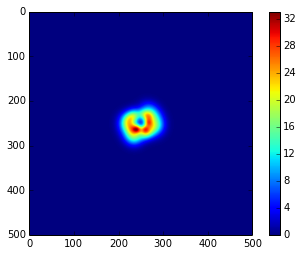

In [180]:
#import d2r
def plotpatch(P, alpha, beta, heights, centerx, centery):
    """Function to plot the patches for a given height range. Using a 2d gaussian
    
       Args:
       -----
       P       : rotational period (seconds)
       alpha   : inclination angle (degrees)
       beta    : impact parameter (degrees)
       hmin    : minimum emission height (in km)
       hmax    : maximum emission height (in km)
       npatch  : number of emission patches
       
       Returns:
       --------
       A plot of the patches projected on to observational plane.
    
    """    
    
#   make a 2D array:
    x = np.linspace(-180, 180, num=500, endpoint=True)
    y = np.linspace(-180, 180, num=500, endpoint=True)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros_like(X)

#   patchcenter or mean of the plot from patch center:
    #cx, cy, theta = patch_center(P, hmin, hmax, npatch)
    #print cx, cy, theta

#   choose random patch widths (wp) depending on how are patches specified:
    patchwidths = patch_width(P, heights)
    #wp = patchwidths 
    

#   wp == the spread (sigma)
#   project the sigmax and sigmay to the line of sight plane:
    #xlos, ylos, thetalos = los(alpha, beta)
    #thet = 5
    #theta = 2 * np.pi * np.random.random(npatch)
    
    peak = 5.
    for cid, comp in enumerate(heights):
        
        sigmax = patchwidths[cid]
        sigmay = patchwidths[cid]
    
        patchCenterX = centerx[cid]
        patchCenterY = centery[cid]
        
        # 2D gaussian:
        for pc in zip(patchCenterX, patchCenterY):
            Z += peak*np.exp(-((X - pc[0])**2 / (2*sigmax**2) + (Y - pc[1])**2 / (2*sigmay**2)))
    
        
        #peak = 5 # trial peak 
        #a = ((np.cos(theta) ** 2) / (2 * sigmax ** 2)) + ((np.sin(theta) ** 2) / (2 * sigmay ** 2))
        #b = (-(np.sin(2 * theta)) / (4 * sigmax ** 2)) + ((np.sin(2 * theta)) / (4 * sigmay ** 2))
        #c = ((np.sin(theta) ** 2) / (2 * sigmax ** 2)) + ((np.cos(theta) ** 2) / (2 * sigmay ** 2))
    
        #Z = []
        #if npatch > 1:
        #for i in np.arange(len(cx)):
        #    #Z = peak * np.exp(-(a[i] * (X - cx[i]) ** 2 - 2 * b[i] * (X - cx[i]) * (Y - cy[i]) + c[i] * (Y - cy[i]) ** 2))
        #    #Z.append(peak * np.exp(-(a[i] * (X - cx[i]) ** 2 - 2 * b[i] * (X - cx[i]) * (Y - cy[i]) + c[i] * (Y - cy[i]) ** 2)))
        #    Z.append(peak*np.exp(-((X - cx[i])**2 / (2*sigmax[i]**2) + (Y - cy[i])**2 / (2*sigmay[i]**2))))
        #if npatch == 1:
        #Z = peak * np.exp(-(a * (X - cx) ** 2 - 2 * b * (X - cx) * (Y - cy) + c * (Y - cy) ** 2)) 
    
    fig1 = plt.figure() # reason for multiple plots    
    #plt.contour(X, Y, Z)
    #plt.xlim(-90, 90)
    #plt.ylim(-90, 90)
    #plt.grid()
    plt.imshow(Z)
    plt.colorbar()
   
    
    
############################ simple test ##########################
if __name__ == "__main__":
    alpha = 10
    beta = 1
    plotpatch(P, alpha, beta, heights, cx, cy)